# Assessing the spatial distribution of access to green space and health inequalities in London's neighbourhoods.

* **Student ID:** 220015902

* **Date:** 29 April 2025

**Abstract:**

In the context of global urbanisation resulting in decreasing contact with nature and poor urban health, there has been a growth in policy using nature-based solutions such as urban green space to promote healthier urban lives. Strong links have been made about the potential health benefits of urban green space through a range of mechanisms, including promoting physical activity, positive mental health and social cohesion. However, difficulties in measuring green space access and confounding variables such as socioeconomic inequalities suggest that this is not a clear picture. In London, a city with high quantities of green space and well-known parks such as Hyde Park, there are also distinct health inequalities throughout the city. In essence, this project aims to assess the spatial patterns of green space access and health inequalities in London using geodemographic classification techniques. This research finds a spatial pattern in health outcomes across London, as well as inequalities in access to green space. Although clustering found some association between green space access and health, the results were inconsistent between clusters and throughout the city. This likely reflects underlying socioeconomic inequalities and variation in green space quality and type. Further research into the role of social structures and different qualities of green space is recommended before drawing strong conclusions about the spatial links between green space and health inequalities in London. 

**Keywords:** Health geographies, socioeconomic inequalities, urban planning, green space.

# GitHub Repository
- **GitHub Link:** https://github.com/milliemcc/IRP 

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:** 

* Introduction
* Research questions
* Literature review
* Methodology
* Results
* Discussion
* Conclusion
* Bibliography
  

## Introduction

Populations across the globe have been undergoing processes of urbanisation and in 2023, this reached 4.61 billion people (World Bank, 2025). A major consequence of this is the decreasing exposure of people to nature (Hartig et al., 2014). Simultaneously, urban populations are facing the challenge of climate change, environmental pollution, heat island effects and dense environments, all of which contribute to poor physical and mental health outcomes (Lee and Maheswaran, 2010; UN, 2025). While there are health benefits to living in urban areas such as greater access to health care and employment, urban stressors can have a detrimental impact on physical and mental health (Gascon et al., 2015). Globally, these environmental and health concerns present a growing concern for policy makers and urban planners 

It is accepted that urban green space can provide strong health benefits to populations, providing a buffer against these challenges. Urban green spaces work through a range of mechanisms to create benefits for mental, physical and environmental health (Hartig et al., 2014; James et al., 2015; Klompmaker et al., 2018). The primary means through which this takes place is by encouraging healthier practices, reducing the stress of urban life and fostering social interactions. However, the distribution of urban green space throughout cities is unlikely to be equal, and likewise with health outcomes (WHO, 2016). This project examines these disparities using geodemographic classification techniques, providing insight into both the spatial patterns of green space and health inequality.

London is a relevant case study to explore this link. In July 2019, it was declared the world’s first National Park City, aiming to have over 50% green space by 2050, investing over £30 million (GLA, 2020). The Greater London Authority (GLA) views parks and green space to promote healthy lifestyles in its urban population, tackling issues of obesity and mental health. In addition, London is known for its stark contrasts in health and socioeconomic equality. Most prominently, a map of London’s tube stations has been used to highlight differences in life expectancy across the city, finding strong differences between neighbourhoods (Cheshire, 2012). The combination of spatial inequalities in health, and current prominence of green space access in the cities policy situates London well as the focus of this research. This project uses geodemographic classification and K-Means clustering to examine spatial patterns, identifying whether disparities in health outcomes align with differences in green space availability.


## Research Questions

To inform policy making for implementing green space to target improving health outcomes, this project seeks to answer the following research questions: 

1.	How can neighbourhoods in London be geodemographically classified based on patterns of health inequality and access to urban green space?
  
2.	Are there distinct geodemographic profiles associated with varying levels of health inequalities and green space access?

  
3.	What are the spatial patterns of health inequality and green space access across neighbourhood clusters in London?


## Literature Review

Urban green space has been widely understood to bring economic, social, environmental and health benefits to the populations of cities (Hartig et al., 2014) and has been employed in urban planning and policy documents (EU, 2015; WHO, 2016; GLA, 2020). In the UN Sustainable Development Goals, Goal 11.7 advocates for safe and inclusive access to green spaces in cities (UN, 2015). In the context of climate change, and rapid urbanisation globally, green spaces have grown in significance, and the role that green spaces can play in a city has gained prominence within the literature (Hartig et al., 2014). This literature review will specifically lay out the mechanisms in which green space interacts with health. 

Currently, there is no universally accepted definition of urban green space resulting in a wide range of variation in the literature. The World Health Organisation (WHO) defines urban green space as “public green areas used predominantly for recreation such as gardens, zoos, parks, and suburban natural areas and forests, or green areas bordered by urban areas that are managed or used for recreational purposes" (WHO, 2016: p.3). However, they state that when producing research focusing on accessibility, or for policy, this must only include green spaces that are open to the public. 

Other variations in definitions of what is included in urban green space involve the inclusion of blue space, which includes water features, ponds and coastal zones (Ibid.; Gascon et al., 2015). When measuring green space in research projects, the way it is quantified and access to green space is defined has real implications for the results found. This is especially true when researching the link between urban green space and health (Klompmaker et al., 2018). The wide variety of definitions of green space in the literature has consequently led to inconsistent findings between research and case studies (Hartig et al., 2014), as is also true for the way health outcomes are defined (Lee and Maheswaran, 2010). This makes it difficult to draw comparisons between research in review articles (Gascon et al., 2015; Hartig et al., 2014; James et al., 2015). In their overarching report on green space and health, WHO emphasise that defining both green space and health is highly subjective and context dependent, therefore research and policy implementation should take a case study approach tailored to the unique context of the city under study (WHO, 2016). 

There are multiple pathways in which green space can be linked to benefits in health outcomes and this is a broad field of study within the literature. Hartig et al. (2014) find links between green space’s effect on air quality, physical activity, social contact and stress reduction. Several functions in the physical green environment such as through trees, work to reduce the impact of poor air quality. It is widely acknowledged that better access to green space promotes physical activity (James et al., 2015). This improves mental and physical wellbeing, contributing to cardiovascular health which reduces the likelihood of disease and obesity (Klompmaker et al., 2018). Greater green space accessibility also contributes to increased social cohesion and fosters a sense of community, promoting interaction with neighbours and individuals in the surrounding community (Hartig et al., 2014). The restorative and stress reducing properties of urban green space has also been acknowledged, including the reduction of exposure to high stress urban environments. The mental health benefits that come from exposure to green space are numerous and through a diverse range of mechanisms, including through the above stated by Hartig et al., (2014) (Gascon et al., 2015). Overall, this demonstrates that there are a range of ways that urban green spaces can benefit the health outcomes of neighbourhoods. 

While there is a clear link between urban green space and improved health, it is a complex relationship and causation cannot be assumed. Overall, studies find a positive association between urban green space and health, however, as previously stated, the definition and factors included in research strongly influence the findings, leaving several reviews to find mixed results (Klompmaker et al., 2018). Therefore, the wide network of variables influencing health and access to green space at the societal, environmental and individual level must be accounted for. Most significantly, urban green space affects different groups of people in diverse ways. Taking an environmental justice perspective, access to good quality environments is rarely equally distributed by race, class or income. There are geographic disparities in exposure to environments and physical features which may harm health. Pearce et al., (2010) find that in the UK, multiple environmental risk factors combine to create a cumulative burden for socioeconomic health. They suggest there is a ‘triple jeopardy’ where the lowest socioeconomic class, which typically have the poorest health, are also exposed to multiple environmental deprivation, creating a cumulative and interconnected burden. It is therefore widely accepted within the literature that there are socioeconomic disparities, meaning that green space is not equally distributed throughout cities (Astell-Burt et al., 2014; Wustemann et al., 2017). Additionally, health is interconnected with socioeconomic determinants, where those with lower incomes are associated with higher mortality rates (Wilkinson, 1997). These factors are complex and interact strongly with other societal factors, including race, education and gender, amongst others (Lee and Maheswaran, 2010). There is a debate over whether environmental or individual characteristics have the biggest influence on urban green space and health within the literature (Ibid.), evidencing the complexity of the relationship which acts at a diverse set of scales. It is therefore important to acknowledge that green space alone cannot determine the health outcome of an individual, as rather it interacts with wider individual and environmental characteristics. 

Despite these factors, Mitchell and Popham (2008) find that urban environments that promote good health, such as green space, could help to reduce health inequalities. Their research in the UK suggest that those with low socioeconomic status have the most to gain from increasing access to green spaces. Therefore, interventions in the physical environment can help to promote better health for individuals that systematically have the worst. Thus, by geodemographically classifying green space exposure and health inequalities, this study seeks to directly inform equitable urban policy in London.

In acknowledgement of the complex and multi-dimensional relationships between access to green space and health, and the impact of socioeconomic inequalities, this project will undertake geodemographic classification techniques to explore how these dynamics are spatially manifested in London. By using clustering techniques, it aims to inform and develop equitable urban policy decisions that address both environmental and health challenges. 


## Methodology

To understand patterns of health inequalities and green space access in London, geodemographic clustering techniques were undertaken using Python. Geodemographic clustering is a way of classifying neighbourhoods based on a selection of characteristics and is frequently used in both the private and public sectors for targeted service planning and marketisation (Birkin and Clarke, 2009). This makes it an appropriate technique to assess the distribution of green space in relation to health inequalities, therefore a unique geodemographic classification method is produced. K-Means clustering techniques were employed to classify neighbourhoods based on varying levels of health inequality and access to green space. 

Geodemographic clustering takes place at the smallest scale of neighbourhood analysis. This project will cluster neighbourhoods at the Lower Layer Super Output Area (LSOA). While the Output Area level is the smallest possible level of analysis, there was a lack of data at this scale, therefore the LSOA has been selected. The area under study is the GLA boundary (GLA, 2025). All layers were clipped to the extent of this boundary. 

The following lines of code demonstrate the data loading and preprocessing techniques used for data on population characteristics. 


## Processing the data

In [10]:
cd IRP

/Users/milliemccallum/Documents/IRP


In [95]:
# Importing the relevant libraries

import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
csv_directory = "Data/Census_2021/raw_data/"

# create a list for all of the census CSVs to be used for the directory 
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# Create an empty dataframe to put the merged set of csvs into
merged_data = pd.DataFrame()

# read the csvs and merge them
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) 
    df_csv = pd.read_csv(csv_path, low_memory=False) 
    merged_data = pd.concat([merged_data, df_csv], axis=1)

merged_data.to_csv("Data/Census_2021/merged_data.csv")
merged_data.head()

,date,geography,geography code,Household size: Total: All household spaces; measures: Value,Household size: 0 people in household; measures: Value,Household size: 1 person in household; measures: Value,Household size: 2 people in household; measures: Value,Household size: 3 people in household; measures: Value,Household size: 4 people in household; measures: Value,Household size: 5 people in household; measures: Value,...,Age: Aged 75 to 79 years,Age: Aged 80 to 84 years,Age: Aged 85 years and over,date,geography,geography code,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked
0,2021,City of London 001A,E01000001,838,0,371,350,70,41,6,...,57,57,35,2021,City of London 001A,E01000001,486,83,346,57
1,2021,City of London 001B,E01000002,824,0,409,315,62,32,5,...,59,43,30,2021,City of London 001B,E01000002,418,52,286,80
2,2021,City of London 001C,E01000003,1015,0,582,323,72,30,7,...,50,31,33,2021,City of London 001C,E01000003,504,105,331,68
3,2021,City of London 001E,E01000005,479,0,219,121,51,44,25,...,17,14,12,2021,City of London 001E,E01000005,463,73,165,225
4,2021,Barking and Dagenham 016A,E01000006,556,0,94,127,104,99,62,...,18,17,16,2021,Barking and Dagenham 016A,E01000006,544,78,223,243


In [24]:
# filter for data only for London 

import geopandas as gpd

lsoa_london_path = "Data/Boundaries /LSOA_2011_London_gen_MHW.shp"
lsoa = gpd.read_file(lsoa_london_path)
lsoa.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [96]:
# merge lsoa data with census and IMD data so these are just for London

csv_path = "Data/Census_2021/merged_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

merged_data = lsoa.merge(csv_data, left_on='LSOA11CD', right_on='geography code', how='left')

In [19]:
# save as csv
merged_data.to_csv("Data/merged_data.csv", index=False)

To assess the spatial patterns of health inequality and green space, it is important to state the definition of green space used as this can have implications for the findings of the project (Klompmaker et al., 2018). The definition of green space for this project is based on the Ordinance Survey (OS) Open Green Space layer which depicts the extent of green areas such as parks and playing fields which are accessible to the public (OS, 2025). This dataset has previously been used in relation to health data for research on strategic planning for the health economy. This excludes blue space from the assessment. To identify exposure to green space, the percentage of green space for each LSOA was calculated as shown below, as well as the distance to green space within a 300m buffer from the LSOA polygon centroid. A 300m buffer was selected as this has been identified as the maximum recommended distance to green space (WHO, 2016)

#### Processing green space data

In [35]:
# merge all of the green space shp into one 

SP_shp = gpd.read_file("Data/Green space/SP_GreenspaceSite.shp")
SU_shp = gpd.read_file("Data/Green space/SU_GreenspaceSite.shp")
TL_shp = gpd.read_file("Data/Green space/TL_GreenspaceSite.shp")
TQ_shp = gpd.read_file("Data/Green space/TQ_GreenspaceSite.shp")

green_space = gpd.GeoDataFrame(pd.concat([SP_shp, SU_shp, TL_shp, TQ_shp], ignore_index=True))
green_space.to_file("Data/Green space/green_space.shp")

In [8]:
# clip to the extent of london

London_shp = gpd.read_file("Data/Boundaries /London_GLA_Boundary.shp")
green_space = gpd.read_file("Data/Green space/green_space.shp")

gs_london = London_shp.clip(green_space)

<Axes: >

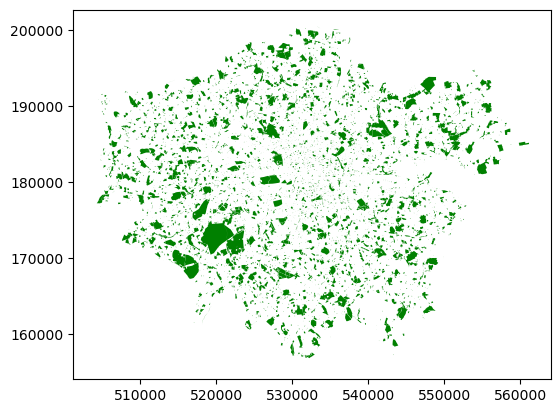

In [9]:
gs_london.plot(color="green")

In [ ]:
# To calculate the percentage of green space in each LSOA:
# Clip the Green space to the boundaries of LSOAs
gs_in_lsoa = gpd.overlay(gs_london, merged_data, how="intersection")

# Calculate the area of green space in each polygon:
gs_in_lsoa["green_area"] = gs_in_lsoa.geometry.area


In [29]:
# calculate the total area of each LSOA:
merged_data["lsoa_area"] = merged_data.geometry.area

In [30]:
# Calculating the sum of green area in each LSOA
green_area_sum = gs_in_lsoa.groupby("LSOA11CD")["green_area"].sum().reset_index()
green_area_sum.columns = ["LSOA11CD", "total_green_area"]

In [31]:
# Merge with LSOA GeoDataFrame
merged_data = merged_data.merge(green_area_sum, on="LSOA11CD", how="left")

# Fill missing values with 0 (in case some LSOAs have no green space)
merged_data["total_green_area"] = merged_data["total_green_area"].fillna(0)

# Calculate percentage
merged_data["percent_green"] = (merged_data["total_green_area"] / merged_data["lsoa_area"]) * 100

In [33]:
# Area of green space within 300m buffer of LSOA centroids

# calculate centroids of each LSOA
merged_data["centroid"] = merged_data.geometry.centroid
lsoas_centroids = merged_data.set_geometry("centroid")

In [ ]:
# Buffer the centroids by 300 meters
lsoas_centroids["buffer_300m"] = lsoas_centroids.geometry.buffer(300)
lsoas_buffers = lsoas_centroids.set_geometry("buffer_300m")

# Perform spatial intersection: only green space inside buffers
green_in_buffer = gpd.overlay(lsoas_buffers, gs_london, how="intersection")

# Calculate area of intersected green space polygons
green_in_buffer["green_area_300m"] = green_in_buffer.geometry.area


In [35]:
# Group by LSOA code and sum the green space area within buffer
green_area_by_lsoa = green_in_buffer.groupby("LSOA11CD")["green_area_300m"].sum().reset_index()
green_area_by_lsoa.columns = ["LSOA11CD", "green_area_300m"]

In [97]:
# Merge green area results back to original LSOA GeoDataFrame
merged_data = merged_data.merge(green_area_by_lsoa, on="LSOA11CD", how="left")


In [37]:
# Fill NaNs (where no green space is within 300m) with 0
merged_data["green_area_300m"] = merged_data["green_area_300m"].fillna(0)

In [38]:
merged_data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,geography code.13,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked,lsoa_area,total_green_area,percent_green,centroid,green_area_300m
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,E01000001,486.0,83.0,346.0,57.0,133320.768859,3184.667649,2.388726,POINT (532150.879 181615.038),7723.947100
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,E01000002,418.0,52.0,286.0,80.0,226191.273063,3059.542050,1.352635,POINT (532443.354 181645.862),3062.904395
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,E01000003,504.0,105.0,331.0,68.0,57302.966528,5222.597453,9.114009,POINT (532207.062 182030.087),14471.092750
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,E01000005,463.0,73.0,165.0,225.0,190738.760508,2158.219915,1.131506,POINT (533618.591 181157.119),1425.501400
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,E01000006,544.0,78.0,223.0,243.0,144195.846859,0.000000,0.000000,POINT (544934.368 184297.551),692.331600


To assess individual and household level characteristics that are indicators of health inequalities at the LSOA level, data from the 2021 England and Wales Census (ONS, 2022) and the Index of Multiple Deprivation (IMD) (Ministry of Housing, Communities and Local Government, 2019) were used. The data covers themes of health, income, ethnicity and population density in each LSOA. This attempts to account for the complex nature of the relationship between health and green space. By integrating this diverse range of social, economic and health indicators with green space access, the geodemographic clustering approach aims to capture the multiple dimensions of the link between health inequalities and green space exposure in London. To create a comparable classification, the percentages of several relevant variables were calculated, as shown below.  

In [40]:
# Create a function to calculate percentage of variables

def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding totals.
total_cols = ['Disability: Total: All usual residents',
              'Disability: Total: All usual residents',
              'General health: Total: All usual residents', 
              'General health: Total: All usual residents',
              'Economic activity status: Total: All usual residents aged 16 years and over',
              'Ethnic group: Total: All usual residents']
              
              

# List of the corresponding values. 
value_cols = ['Disability: Disabled under the Equality Act',
              'Disability: Not disabled under the Equality Act: Has long term physical or mental health condition but day-to-day activities are not limited',
              'General health: Bad health', 
              'General health: Very bad health',
              'Economic activity status: Economically active (excluding full-time students): Unemployed',
              'Ethnic group: White']

result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)
              

In [42]:
result_dataframe.shape

(4835, 6)

In [98]:
# combine the percentage dataframe with the original dataframe

concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)

These variables were combined with the original dataset. Next, a subset was created with all of the relevant variables to be included in the geodemographic classification. The following variables were included in the geodemographic classification: 

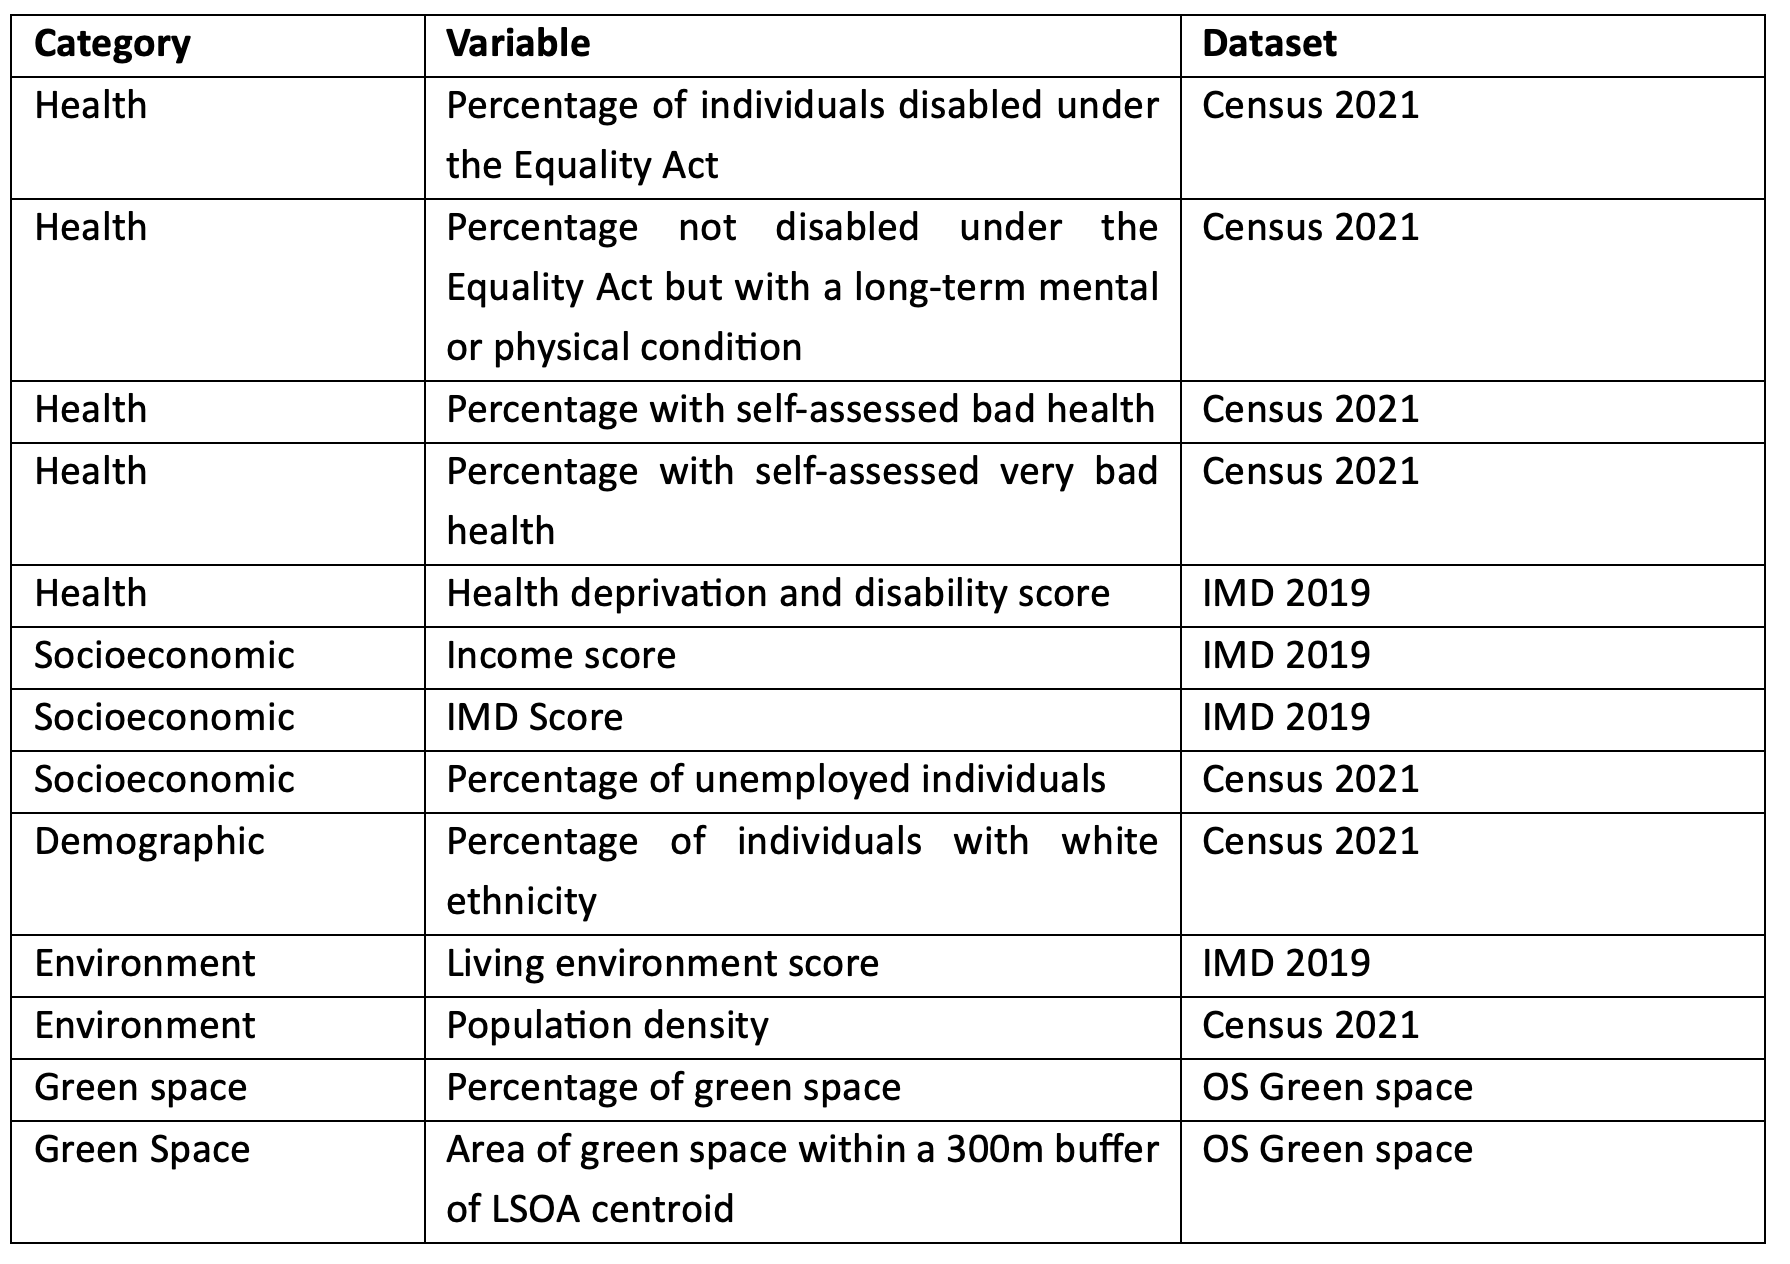


In [44]:
# make a new subset of only the important columns 
# this includes the percentage columns and key identifying columns

keep_cols = ['LSOA11CD',
             'USUALRES',
             'HHOLDRES',
             'geometry',
             'Disability: Disabled under the Equality Act_percentage',
             'Disability: Not disabled under the Equality Act: Has long term physical or mental health condition but day-to-day activities are not limited_percentage',
             'General health: Bad health_percentage',
             'General health: Very bad health_percentage',
             'Economic activity status: Economically active (excluding full-time students): Unemployed_percentage',
             'Ethnic group: White_percentage',
             'green_area_300m',
             'percent_green',
             'Index of Multiple Deprivation (IMD) Score',
             'Income Score (rate)',
             'Health Deprivation and Disability Score',
             'Living Environment Score',
             'Population Density: Persons per square kilometre; measures: Value']

In [45]:
london_data = concatenated_df[keep_cols]

In [47]:
short_column_names = {'Disability: Disabled under the Equality Act_percentage': 'Disability',
             'Disability: Not disabled under the Equality Act: Has long term physical or mental health condition but day-to-day activities are not limited_percentage': 'Limiting_illness',
             'General health: Bad health_percentage':'Bad_health',
             'General health: Very bad health_percentage':'Very_bad_health',
             'Economic activity status: Economically active (excluding full-time students): Unemployed_percentage':'Unemployed',
             'Ethnic group: White_percentage': 'White',
             'Index of Multiple Deprivation (IMD) Score':'IMD_score',
             'Income Score (rate)':'IMD_income',
             'Health Deprivation and Disability Score': 'IMD_health',
             'Living Environment Score': 'IMD_environment',
             'Population Density: Persons per square kilometre; measures: Value': 'pop_density'}

london_data = london_data.rename(columns=short_column_names)


To standardise these variables, allow for comparison and to create geodemographic classification, the z-score was calculated. The multicollinearity of the variables was then tested for and eliminated. A threshold of 0.8 for Pearsons Correlation Coefficient was set for variables. This calculates the correlation between variables on a scale of -1 to 1, and variables with a correlation stronger than 0.8 were removed. It is important to test for multicollinearity when conducting geodemographic classification as a strong correlation between two variables may distort the model or over-emphasise the influence of a variable. Here, several of the variables were found to have a correlation and therefore the percentage with a disability, 300m green space buffer and IMD Score were removed from the clustering technique. 

In [48]:
# Calculate the z-scores for each of the variables 

numeric_columns = london_data.select_dtypes(include=['float64'])
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

,Disability,Limiting_illness,Bad_health,Very_bad_health,Unemployed,White,green_area_300m,percent_green,IMD_score,IMD_income,IMD_health,IMD_environment,pop_density
0,-1.013141,2.822989,-1.705372,-0.578379,-1.207078,1.311546,-0.496336,-0.488332,-1.372012,-1.700761,-1.827742,0.326961,0.230178
1,-0.911584,2.849558,-1.273445,-0.893581,-1.248611,1.209824,-0.601962,-0.560914,-1.468829,-1.342105,-1.053383,-0.493506,-0.639852
2,0.086741,2.317782,-0.438003,-1.164307,0.340544,0.992740,-0.343436,-0.017203,-0.172575,-0.651359,0.401953,1.135573,2.859567
3,1.254820,-0.529966,2.083656,0.753599,1.602938,-0.902932,-0.639068,-0.576404,0.668321,1.009086,0.374656,0.056802,-0.682603
4,-0.698427,-1.743312,-0.318890,-0.962392,-0.032084,-1.207290,-0.655682,-0.655670,-0.133030,-0.239569,0.032731,-0.138397,0.430675


In [49]:
# use the z-score to test for any correlations between variables
# the darker the colour, the more highly correlated the variables are 
# create a plot to visually represent this using .corr

corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Disability,Limiting_illness,Bad_health,Very_bad_health,Unemployed,White,green_area_300m,percent_green,IMD_score,IMD_income,IMD_health,IMD_environment,pop_density
Disability,1.000000,-0.044469,0.819570,0.682482,0.318830,-0.059488,0.011513,0.021073,-0.038161,-0.035286,-0.009868,-0.002950,0.033101
Limiting_illness,-0.044469,1.000000,-0.347376,-0.287674,-0.456998,0.729948,0.032106,0.034242,-0.082503,-0.067809,-0.065596,0.020562,-0.219784
Bad_health,0.819570,-0.347376,1.000000,0.688781,0.474942,-0.336706,-0.012354,-0.006374,0.008004,0.003628,0.027751,0.009146,0.180845
Very_bad_health,0.682482,-0.287674,0.688781,1.000000,0.403618,-0.276616,-0.031249,-0.033205,0.012687,0.008296,0.030189,0.042283,0.207076
Unemployed,0.318830,-0.456998,0.474942,0.403618,1.000000,-0.558808,-0.071029,-0.084004,0.058817,0.044504,0.106172,0.083319,0.396276
White,-0.059488,0.729948,-0.336706,-0.276616,-0.558808,1.000000,0.046348,0.056039,-0.067612,-0.051026,-0.070348,-0.029759,-0.299374
green_area_300m,0.011513,0.032106,-0.012354,-0.031249,-0.071029,0.046348,1.000000,0.882537,0.009338,0.012329,-0.019442,-0.014449,-0.331290
percent_green,0.021073,0.034242,-0.006374,-0.033205,-0.084004,0.056039,0.882537,1.000000,0.001419,0.003800,-0.027231,-0.017946,-0.402269
IMD_score,-0.038161,-0.082503,0.008004,0.012687,0.058817,-0.067612,0.009338,0.001419,1.000000,0.958097,0.822291,0.294599,0.045754
IMD_income,-0.035286,-0.067809,0.003628,0.008296,0.044504,-0.051026,0.012329,0.003800,0.958097,1.000000,0.788288,0.154257,0.036152


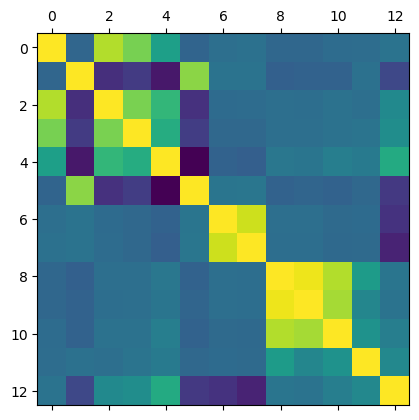

In [50]:
# Create a matrix to represent the higher correlated variables

import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

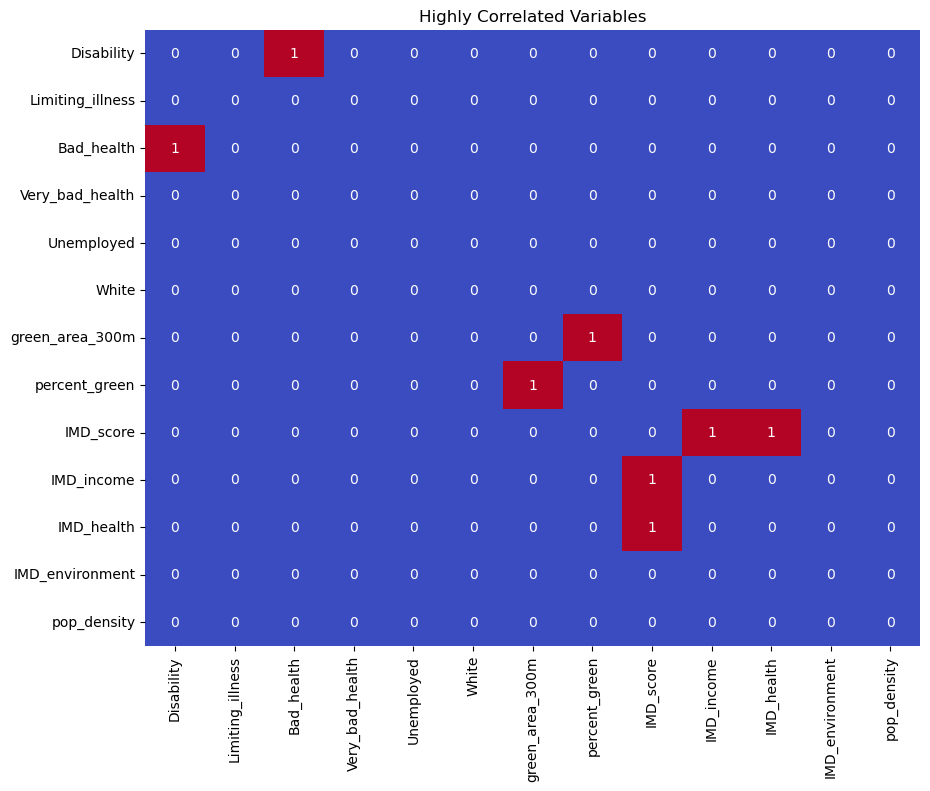

In [51]:
# Identify any highly correlated variables and try to remove them 

threshold = 0.8

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# The plot will represent  BINARY table 0 for false( out of the threshold) and 1 for above the threshold

In [52]:
# Drop highly correlated variables to reduce the issue of multicolinearity

z_score_df.drop(['Disability', 'green_area_300m', 'IMD_score'], axis=1, inplace=True)
z_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Limiting_illness  4659 non-null   float64
 1   Bad_health        4659 non-null   float64
 2   Very_bad_health   4659 non-null   float64
 3   Unemployed        4659 non-null   float64
 4   White             4659 non-null   float64
 5   percent_green     4835 non-null   float64
 6   IMD_income        4659 non-null   float64
 7   IMD_health        4659 non-null   float64
 8   IMD_environment   4659 non-null   float64
 9   pop_density       4659 non-null   float64
dtypes: float64(10)
memory usage: 377.9 KB


In [53]:
corr_2 = z_score_df.corr()
corr_2.style.background_gradient(cmap='coolwarm')

,Limiting_illness,Bad_health,Very_bad_health,Unemployed,White,percent_green,IMD_income,IMD_health,IMD_environment,pop_density
Limiting_illness,1.000000,-0.347376,-0.287674,-0.456998,0.729948,0.034242,-0.067809,-0.065596,0.020562,-0.219784
Bad_health,-0.347376,1.000000,0.688781,0.474942,-0.336706,-0.006374,0.003628,0.027751,0.009146,0.180845
Very_bad_health,-0.287674,0.688781,1.000000,0.403618,-0.276616,-0.033205,0.008296,0.030189,0.042283,0.207076
Unemployed,-0.456998,0.474942,0.403618,1.000000,-0.558808,-0.084004,0.044504,0.106172,0.083319,0.396276
White,0.729948,-0.336706,-0.276616,-0.558808,1.000000,0.056039,-0.051026,-0.070348,-0.029759,-0.299374
percent_green,0.034242,-0.006374,-0.033205,-0.084004,0.056039,1.000000,0.003800,-0.027231,-0.017946,-0.402269
IMD_income,-0.067809,0.003628,0.008296,0.044504,-0.051026,0.003800,1.000000,0.788288,0.154257,0.036152
IMD_health,-0.065596,0.027751,0.030189,0.106172,-0.070348,-0.027231,0.788288,1.000000,0.234294,0.110527
IMD_environment,0.020562,0.009146,0.042283,0.083319,-0.029759,-0.017946,0.154257,0.234294,1.000000,0.166017
pop_density,-0.219784,0.180845,0.207076,0.396276,-0.299374,-0.402269,0.036152,0.110527,0.166017,1.000000


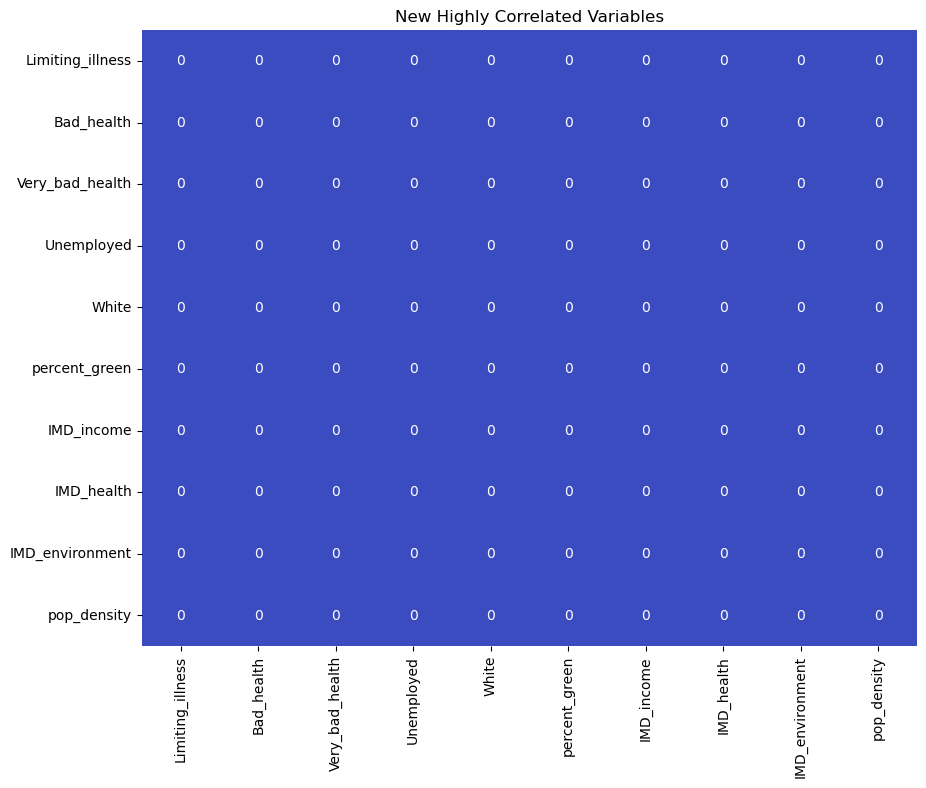

In [54]:
threshold = 0.8
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

In [55]:
# Check for NaN values: 

contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The dataFrame does not contain NaN values!")

The DataFrame contains NaN values.


In [56]:
# Replace any NaN values with the mean using inplacing 

z_score_df.fillna(z_score_df.mean(), inplace=True)

In [57]:
z_score_df.head()

,Limiting_illness,Bad_health,Very_bad_health,Unemployed,White,percent_green,IMD_income,IMD_health,IMD_environment,pop_density
0,2.822989,-1.705372,-0.578379,-1.207078,1.311546,-0.488332,-1.700761,-1.827742,0.326961,0.230178
1,2.849558,-1.273445,-0.893581,-1.248611,1.209824,-0.560914,-1.342105,-1.053383,-0.493506,-0.639852
2,2.317782,-0.438003,-1.164307,0.340544,0.992740,-0.017203,-0.651359,0.401953,1.135573,2.859567
3,-0.529966,2.083656,0.753599,1.602938,-0.902932,-0.576404,1.009086,0.374656,0.056802,-0.682603
4,-1.743312,-0.318890,-0.962392,-0.032084,-1.207290,-0.655670,-0.239569,0.032731,-0.138397,0.430675


In [58]:
z_score_df.shape

(4835, 10)

After the data had been processed, K-Means clustering was employed. To test for the most appropriate number of clusters (K) to use in analysis, the ‘elbow method’ was used. This plots the number of clusters against the within-cluster sum of squares (WCSS), measuring how tight the clusters are internally. The elbow is where the rate of WCSS slows and suggests the optimum number of K. In this instance, the elbow appears to lie around 3 or 4, suggesting this is an appropriate number of clusters.

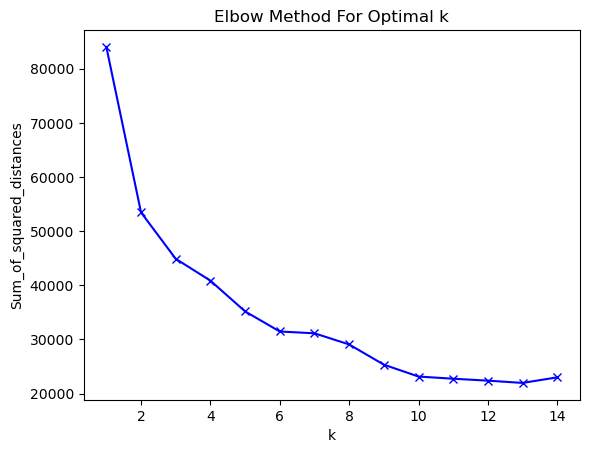

In [62]:
Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

To further assess the appropriate number of clusters, the elbow method for the between-cluster sum of squares was assessed. This attempts to measure how separate clusters are from each other and in this instance, finds the appropriate number of K to lie at around 5 or 6 as after this point, the line flattens suggesting additional clusters will not improve separation much further. 

In [63]:
# KMeans with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

(array([1010.,    0.,    0., 1122.,    0.,    0.,  779.,    0.,    0.,
        1924.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

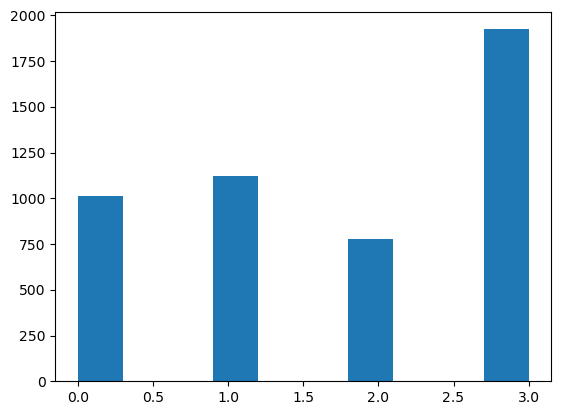

In [65]:
plt.hist(labels)

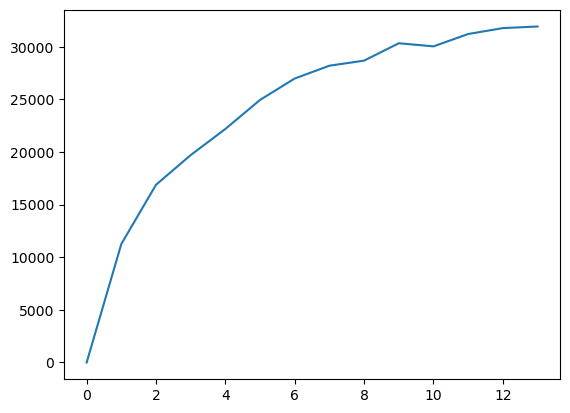

In [67]:
# find the between cluster sum of squares to measure how distinctive clusters are from each other

import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

Due to the variation in the results of these models, a visual representation of the clusters was plotted to assess the suitability of different values of K. After plotting the clusters with differing values of K from K=3 up to K=6, the plot appeared the most visually suitable when K=4. Principle component plotting techniques were employed, and the results where K=4 are displayed below. While there is some overlap between variables, this is reflective of the messiness of real-world data, however, overall, the clusters appear visually distinct from each other.  

In [ ]:
# Evaluate the above classification for k=4 using principle component plotting techniques

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

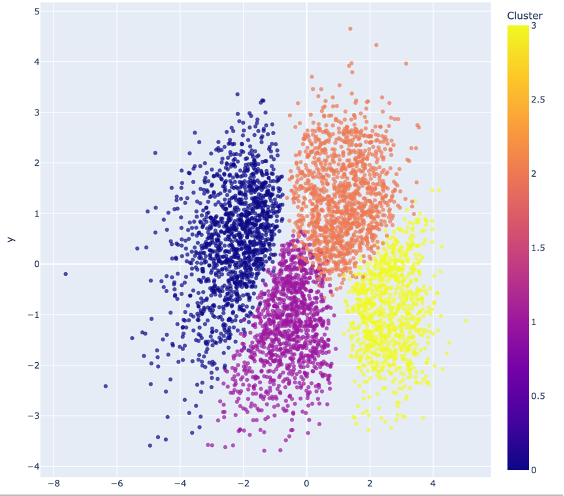

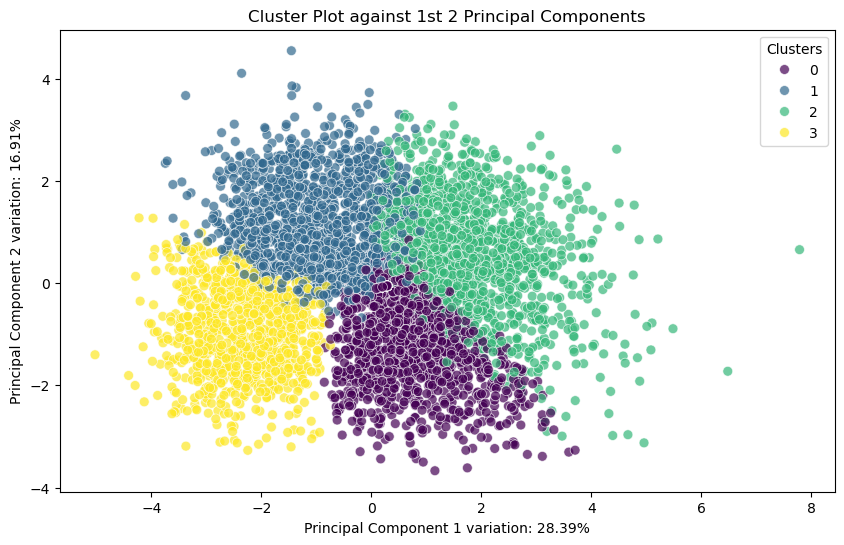

In [72]:
# Here is a static figure with the point variability included in the x/y-axis label.
# So we can see what variability is provided by each component.

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()


To understand and evaluate the clusters, it was necessary to interpret the cluster centres. A classification for health inequalities and green space could be formulated. This took place by finding the cluster centres and plotting them using a spider diagram to understand what each cluster represented. The product of this is found in the results section of this report. Finally, to map the clusters, the cluster column was recombined with the original data frame. This allowed an interactive plot to be mapped using the ‘explore’ function of Geopandas. This allowed for the identification of spatial patterns and inequalities, as well as an in depth understanding of specific neighbourhoods in London. The processing steps for this are shown below while the interactive map is found in the results section of this report.  

## Results

The results from the above classification technique find that health inequalities and green space access can be clustered to find distinct geodemographic profiles and spatial patterns across a range of social, economic and environmental variables. Four unique clusters can be identified across London which classify neighbourhoods allowing spatial patterns to be identified and conclusions drawn on the relation between health and green space access. The attributes of the clusters are examined in detail below. 

In [73]:
# KMeans clustering
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

# Create a new DataFrame with cluster assignments and column names
#result_df = pd.DataFrame({'Cluster': clusters, 'Column': z_score_df.columns})

cluster_centers.head(3)

,Limiting_illness,Bad_health,Very_bad_health,Unemployed,White,percent_green,IMD_income,IMD_health,IMD_environment,pop_density,Cluster
0,-0.370326,0.277186,0.187777,0.145886,-0.283198,2.219231,0.336185,0.268200,0.168095,-0.784786,1.346847
1,0.901436,-0.584403,-0.559473,-0.899428,0.958385,0.156821,-0.813208,-0.927653,-0.552684,-0.635324,3.000000
2,-0.594505,0.521077,0.476918,0.601497,-0.635019,-0.338086,-0.189450,-0.141387,-0.081880,0.420416,0.930093


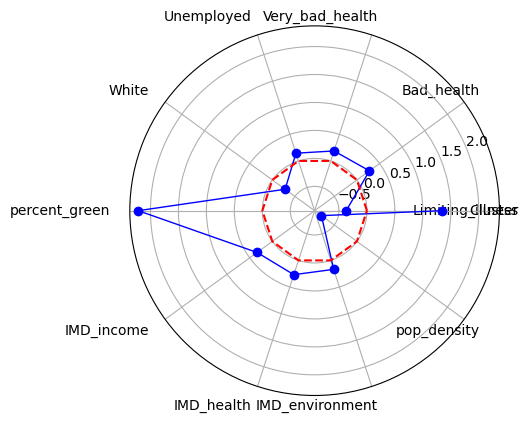

In [79]:
# Visualise the cluster centres: 
# Code adapted from: https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html
# For cluster 1

first_row_centers = cluster_centers.iloc[0, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')

# Add an extra red line at the 0.0 value depicting the average value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()


The results from the spider diagram for Cluster 1 are shown above. This shows that neighbourhoods classified as Cluster 1 have a high percentage of green space, suggesting good green space access. This cluster also has low population density, so therefore may be reflective of neighbourhoods in more suburban areas and the outskirts of London, where there is more room for green space. However, there appears to be moderate levels of deprivation in neighbourhoods in this cluster, with self-reported health slightly worse than average, as well as IMD scores that are higher than average, suggesting greater deprivation. Unemployment is also slightly higher than average, and there is a lower percentage of the white population, suggesting these are more ethnically diverse neighbourhoods. Overall, this represents suburban neighbourhoods in London with high green space access but facing moderately poor health. 

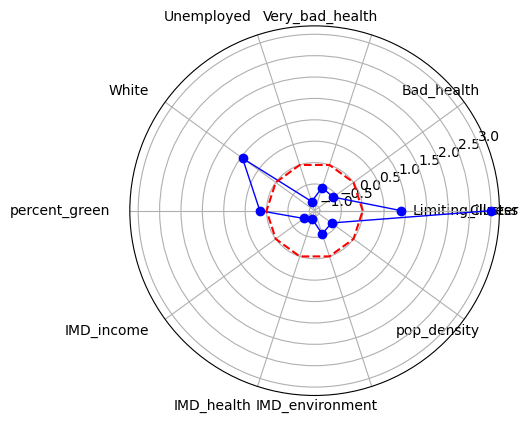

In [75]:
# For cluster 2

first_row_centers = cluster_centers.iloc[1, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')
ax.set_title('Cluster 2')

plt.show()
#Ignore the cluster polar values, and focus in he census variables.

The results from Cluster 2 indicate that these neighbourhoods are relatively affluent with generally good health. All IMD scores are far below average, as is self-assessed health and unemployment rates. This indicates that these are areas of low deprivation. However, the rate of limiting physical or health conditions is above average, this potentially reflects a wealthier and older population that may suffer from age-related chronic conditions. The percentage of green space in these neighbourhoods is moderate, despite the very low population density. Overall, this cluster represents suburban neighbourhoods with relatively good health and low levels of deprivation with moderate access to green space. 

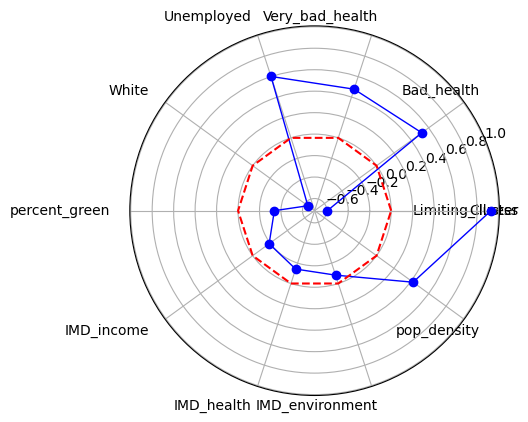

In [76]:
# For cluster 3

first_row_centers = cluster_centers.iloc[2, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()


Cluster 3 presents a complex picture of poor health, low IMD scores and low access to green space. Self-assessed poor health appears to be significantly worse than average, however the proportion of individuals in these neighbourhoods with a limiting illness is below average. There is higher than average unemployment and high ethnic diversity. The IMD scores are low, in contrast the IMD scores are low for income, health and environment, suggesting lower levels of deprivation. The percentage of green space in these clusters is also lower than average. Population density is high, suggesting these are more likely to be inner city neighbourhoods. 

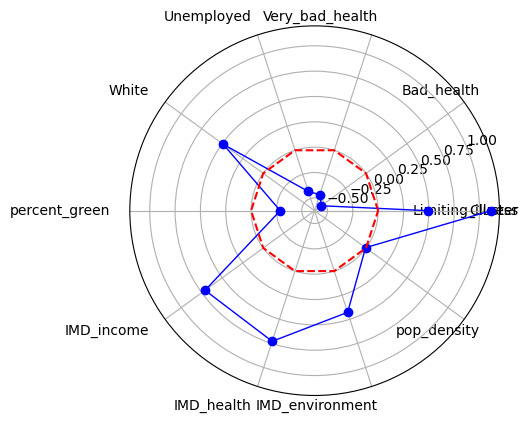

In [77]:
# For cluster 4

first_row_centers = cluster_centers.iloc[3, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

Cluster 4 shows relatively good health but poor IMD scores and limited access to green space. Rates of poor self-assessed health are below average, and rates of people with limiting illnesses are slightly higher than average. These neighbourhoods have slightly less green space than average for London. However, the IMD scores of each domain are higher than the London average. This suggest that despite the better health outcomes, neighbourhoods in this classification are relatively more deprived. The IMD score for health deprivation and disability is contrastingly high in comparison to the low rates of poor self-reported health. This presents a complicated and unclear picture of health in neighbourhoods in Cluster 4.

To crudely summarise the above clusters, to help inform cluster labelling, the following table was produced. This classifies neighbourhoods based on their health outcomes, access to green space, deprivation indicators and population characteristics, which are all important variables in understanding green space access and its relation to health outcomes. 

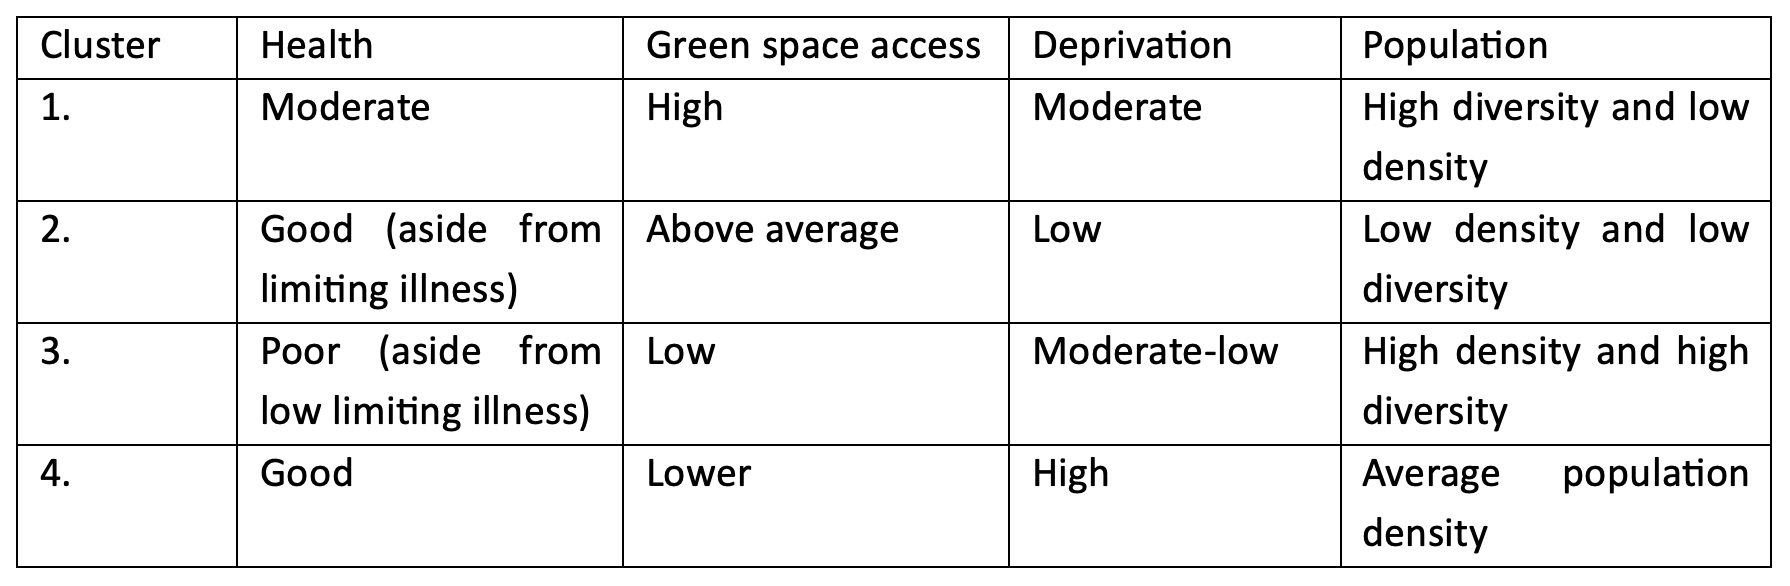


Based on the above table summary, the four clusters will be classified with the following labels: 

1.	Suburban green with moderate health outcomes 
2.	Affluent suburbs with good health 
3.	Diverse inner-city areas with low green space and poorer health 
4.	Deprived urban areas with low green space access and conflicting health outcomes


In [ ]:
list(z_score_df.columns)

In [ ]:
z_score_df.drop(['Bad_health',
 'Limiting_illness',
 'Very_bad_health',
 'Unemployed',
 'White',
 'percent_green',
 'IMD_income',
 'IMD_health',
 'IMD_environment',
 'pop_density'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
# Concatenate the resulting tables.
final_df = pd.concat([london_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

In [ ]:
def rename_column(x): 
    rename_clusters = {
        0: "Suburban green with moderate health challenges",
        1: "Affluent suburbs with good health",
        2: "Diverse inner city areas with low green space and poorer health",
        3: "Deprived urabn areas with limited green space and mixed health outcomes"
    }
    return rename_clusters.get(x, x)  
    
final_df['Cluster'] = final_df['Cluster'].apply(rename_column)
final_df.head()

In [ ]:
final_df.explore(column='Cluster', cmap='Set2', tiles='CartoDB positron')

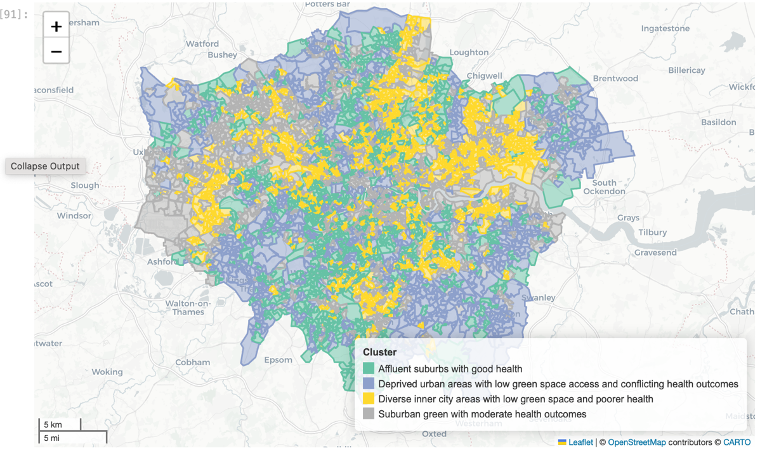

The above map shows the spatial distribution of the geodemographic clusters across London. Cluster 2 (Affluent suburbs with good health) appears to lie in neighbourhood clusters outside of the inner city in areas such as Wimbledon, Richmond and parts of Sutton. For areas such as Richmond and Wimbledon, these are known to be affluent areas with well-regarded parks such as Richmond Park. 

Neighbourhoods in Cluster 4 (Deprived urban areas with low green space and mixed health outcomes) are distributed in clusters through the outer ring of London. These areas are traditionally more affordable but higher density and low green space areas. The mixed health outcomes may reflect the range of individuals that are attracted to these areas as they fall in the transition between urban and suburban areas. It is likely that historical factors may have influenced the availability of large parks in comparison to wealthy areas such as Wimbledon. 

Cluster 3 (Diverse inner-city areas with low green space and poorer health) has a spatial distribution throughout the inner ring of the city. This includes neighbourhoods in areas such as Camden, Newham and Tower Hamlets. These neighbourhoods have very high diversity and population densities and consequently low green spaces. In these crowded neighbourhoods, likely with older housing stocks due to their location, there are poor health outcomes. As an example, Newham, in the East of London, is a highly deprived borough facing several challenges, including a high prevalence of poor mental and physical health barriers (Newham Public Health, 2022). In comparison to the suburbs of London, there is significantly less green space. 

Finally, neighbourhoods in Cluster 1 (Suburban green with moderate health outcomes) have a much more irregular spatial distribution but can be found in the outer suburbs of London as well as a clustered in the city centre. These are areas with decent access to green space and moderate health outcomes. These areas are not severely deprived but also not especially affluent. It is likely that processes of gentrification may not have affected these neighbourhoods as significantly as those in other wealthier clusters, therefore some worse health outcomes may remain despite the high access to green space.

Overall, there is a clear spatial gradient found in the geodemographic classification where healthier, wealthier and greener neighbourhoods are found in the suburban areas of London. In contrast, lower population densities and poorer, less green, and more dense neighbourhoods are clustered towards the centre, with a mixed range of health outcomes. 


## Discussion

Health outcomes clearly have an unequal spatial distribution throughout London. As shown by the distribution of Cluster 2, affluent suburban areas have the highest levels of reported good health, as well as the lowest levels of deprivation. Suburban areas typically have lower population densities and therefore more room for green space. The large parks in London’s suburbs make these areas more desirable to live in, increasing house prices which attracts wealthier households to these neighbourhoods (Astell-Burt et al., 2014). Neighbourhoods with poor health outcomes appear to be concentrated in inner city, deprived and dense areas. This could be linked to the higher environmental stresses associated with living in dense urban environments (Hartig et al., 2014), or the strong correlation between health deprivation and socioeconomic inequality (Pearce et al., 2010). The industrial past of some of London’s inner-city neighbourhoods could also be correlated to the densely populated nature of these areas, and resulting poorer health, linking to the urban health penalty theory, whereby those in dense urban areas have historically had worse health outcomes than those in rural areas (McDonald and Beatley, 2020). Overall, there is a clear spatial pattern in health inequality across London. 

However, when making comparisons between health inequality and green space, the results paint a more complex and unclear picture. Green space, health and deprivation are closely linked (Mitchell and Popham, 2008). Consequently, deprivation cannot be ignored when exploring the link between green space access and health inequalities as wider societal structures and real-world influences complicate their correlation. As seen in Cluster 1, some deprived areas still have access to green space while facing moderate health challenges. Cluster 3 has both worse green space and worse health, while also representing areas with fairly low deprivation. Additionally, Cluster 4 with lower access to green space has a wide mix of health outcomes, with relatively positive self-reported health, but a poor score on IMD health disparities and disabilities. These mixed results in the clustering techniques highlight the complexity of the relationship between green space and health outcomes. 

This ambiguity and complexity are likely representative of the wider range of factors that can shape the health outcome and availability of green space of a neighbourhood. Broader societal structures, including ethnicity can have an influence. For example, the most ethnically diverse neighbourhoods appear to be in Cluster 3, in central, deprived areas with poor health outcomes. This may be representative of wider systemic inequalities that shape housing, access to health care, education and employment. Overall, while there appears to be a pattern in green space access and health inequalities, it cannot be assumed that this is causal. Although the health benefits of green space have been widely reported (Hartig et al., 2014), the broader structures of social inequality that influence health and access to green space must be accounted for. This presents an unclear and complex picture. 

This has implications for the way policymaking decisions are undertaken for both urban planning and health interventions. This research supports a targeted intervention approach to improve health. These interventions should be centred on improving green space in inner-city areas where there is currently a stark contrast in availability when compared to affluent suburban neighbourhoods. Additionally, policy should focus on addressing wider socioeconomic factors in addition to environmental improvements. A cautious approach should be taken as improving urban health outcomes across a city requires a rounded and holistic approach, as simply increasing green space in inner-city areas is not sufficient to improve health. Instead, policy must simultaneously address poverty, unemployment and access to health services to be impactful. 


## Limitations

While this project presents valuable insights for policy development by combining rich and multidimensional datasets at a small scale, there are several limitations that must be accounted for. Firstly, the complex and multidimensional nature of both access to green space and health outcomes makes it difficult to infer any degree of causality through the outputs and findings of this research. The cross-sectional, as opposed to longitudinal, nature of the research also compounds this limitation as causal links between health and green space cannot be established, rather only a snapshot of the complex spatial interrelations between variables can be assessed. 

Secondly, while measuring green space through its quantity is useful, a deeper insight could be gained by including measures of quality, size and characteristics. These variables have been suggested to influence the health-improving effect of green space (WHO, 2016). Thirdly, valuable demographic and environmental indicators such as air pollution, life expectance, mortality and transport, were not available at the LSOA level. As the LSOA level is granular, there are privacy concerns over sharing sensitive information such as physical and mental health. This therefore limited the extent of variables included in the geodemographic classification, reducing its applicability. 


## Further Research

To further explore the spatial links between access to green space and health inequalities, this project can help inform future research directions. This could include a longitudinal survey, allowing change in neighbourhoods over time to be assessed. The effect of changes such as gentrification (Cole et al., 2019) and the implementation of green space infrastructure on green space access and health inequality in London could be analysed. By comparing changes in findings over time, there is the potential for more direct and rich correlations to be drawn.

Furthermore, by including additional and more specific demographic variables in the geodemographic classification, such as mortality rate, life expectancy, mental health and physical activity, the relation between green space access and specific aspects of health could be assessed. Finally, including a greater number of indicators for green space could enhance understandings about the types of green space that are linked to health inequality. For example, examining the link between quality of green space, health inequality and socioeconomic status of a neighbourhood. 


## Conclusion

In conclusion, in London, there are spatial patterns in the distribution of green space as well as health patterns. Some conclusions can be drawn about correlations between access to green space and health inequalities, as evidenced by comparing the clustering results of Cluster 2 and Cluster 3. This suggests that higher proportions of green space in a neighbourhood may improve health outcomes, as suggested by previous scholars. However, through the inclusion of measures of deprivation, ethnicity and income in clustering techniques and conflicting health results in cluster traits, it is likely that wider societal structures and mechanisms of inequality are involved. Consequently, this research cannot state that the relationship between access to green space and health outcomes is causational. Rather, this complicates the relationship and suggests it is the product of a complex interplay of factors acting at multiple dimensions. These societal structures likely shape the distribution of green space and health outcomes individually, as well as the way they interact with each other. In sum, while access to green space plays a part in improving public health, it is part of a much larger picture. Effective public health policies must adopt an integrated approach which combines urban planning with social policy, accounting for socioeconomic structures. This will foster healthier and more equitable urban environments for all. 

## Bibliography

Astell-Burt, T., Feng, X., Mavoa, S., Badland, H.M. and Giles-Corti B. (2014) “Do low-income neighbourhoods have the least green space? A cross-sectional study of Australia’s most populous cities”, BMC Public Health, 14 (1), 292.

Birkin, M. and Clarke, G.P. (2009) “Geodemographics”, International Encyclopedia of Human Geography, pp.382-389.

Cheshire, J. (2012) “Featured Graphic. Lives on the Line: Mapping Life Expectancy along the London Tube Network”, Environment and Planning, 44 (7).

Cole, H.V.S., Triguero-Mas, M., Connolly, J.J.T., Anguelovski, I. (2019) “Determining the health benefits of green space: Does gentrification matter?”, Health and Place, 57 (1), pp.1-11.

EU (2015) Towards an EU research and innovation policy agenda for nature-based solutions and re-naturing cities. Available at: https://op.europa.eu/en/publication-detail/-/publication/fb117980-d5aa-46df-8edc-af367cddc202 (Accessed: 25 April 2025)

Gascon, M., Triguero-Mas, M., Martinez, D., Dadvand, P., Forns, J., Plasencia, A. and Nieuwenhuijsen (2015) “Mental health benefits of long-term exposure to residential green and blue spaces: A systematic review”, International journal of environmental research and public health, 12 (1), pp.4354-4379.

GLA (2020) London green Spaces Commission Report. Available at: https://www.london.gov.uk/sites/default/files/4244_-_gla_-_london_green_spaces_commission_report_v7_0.pdf (Accessed: 25 April 2025)

Hartig, T., Mitchell, R., de Vries, S. and Frumkin, H. (2014) “Nature and Health”, Annual Review of Public Health, 35 (1), pp.207-228

James, P., Banay, R.F., Hart, J.E. and Laden, F. (2015) “A review of the health benefits of greenness”, Environmental Epidemiology, 2 (1), pp.131-142.

Klompmaker, J.O., Hoek, G., Bloemsma, L.D., Gehring, U., Strak, M., Wijga, A.H., van den Brink, C., Brunekreef, B., Lebret, E. and Janssen, N.A.H. (2018) “Green space definition affects associations of green space with overweight and physical activity”, Environmental Research, 160 (1), pp.531-540.

Lee, A.C.K. and Maheswaran, R. (2011) “The health benefits of urban green spaces: a review of the evidence”, Journal of Public Health, 33 (2), pp.212-222.

McDonald, R. and Beatley, T. (2020) “Cities as Inhumane: The urban health penalty”, Biophilic Cities for an Urban Century. Palgrave Pivot, Cham.

Ministry of Housing, Communities and Local Government (2019) English Indices of Deprivation 2019. Available at: https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019 (Accessed: 24 April 2025).

Mitchell, R. and Popham, F. (2008) “Effect of exposure to natural environment on health inequalitiesL an observational population study”, The Lancet, 372 (9650), pp.1655-1660.

Newham Public Health (2022) Employment and health in Newham: Needs Assessment. Newham London. Available at: https://www.newham.gov.uk/downloads/file/5109/employment-and-health-jsna-20220912 (Accessed: 28 April 2025).

ONS (2022) Census 2021 Bulk Data Download. Available at: https://www.nomisweb.co.uk/sources/census_2021_bulk  (Accessed: 25 April 2025).

OS (2025) OS Open Greenspace. Available at: https://osdatahub.os.uk/downloads/open/OpenGreenspace?_gl=1*w4d50d*_gcl_au*NDI2NDg5MDc4LjE3NDU3ODAwODk.*_ga*MTk5MzYyOTk5OC4xNzQ1NDc5MzIz*_ga_59ZBN7DVBG*MTc0NTc4MDA4OS4yLjEuMTc0NTc4MDI4MS41OS4wLjA.*_ga_E5T3PCFCG7*MTc0NTc4MDA4OS4yLjEuMTc0NTc4MDI4MS4wLjAuMA (Accessed: 24 April 2025).

UN (2015) Transforming our world: the 2030 agenda for sustainable development.

Wilkinson, R.G. (1997) “Socioeconomic determinants of health: Health inequalities: relative or absolute material standards?”, BMJ, 314, pp.591.

WHO (2016) Urban green spaces and health. Copenhagen: WHO Regional Office for Europe. Available at: https://www.who.int/europe/publications/i/item/WHO-EURO-2016-3352-43111-60341 (Accessed: 23 April 2025).

WHO (2025) Urban Health. Available at: https://www.who.int/news-room/fact-sheets/detail/urban-health#:~:text=Poorly%20designed%20urban%20transport%20systems,of%20noncommunicable%20disease%20and%20injuries. (Accessed: 29 April 2025).

World Bank (2025) Urban Population. World Bank Data. Available at: https://data.worldbank.org/indicator/SP.URB.TOTL (Accessed: 29 April 2025).
